In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv('pima-indians-diabetes-database.zip')

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
var = [x for x in df.columns if x!='Outcome']

In [84]:
var

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [85]:
var = [x for x in var if x not in ['Insulin','SkinThickness']]

In [86]:
df.shape

(768, 9)

In [87]:
df = df[(df.BloodPressure>30)&(df.BMI>19)&(df.Glucose>50)]

In [88]:
df.shape

(716, 9)

In [89]:
716/768

0.9322916666666666

In [90]:
df.reset_index(drop=True,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d94d2a58>,
      dtype=object)

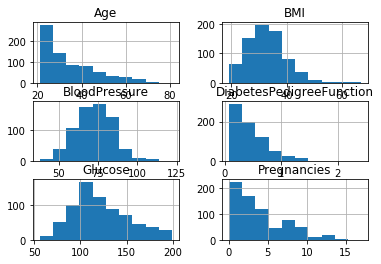

In [91]:
df[var].hist()

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [93]:
X = df[var].copy()
y = df['Outcome']

In [15]:
sc = StandardScaler()

In [16]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
Xs = pd.DataFrame(sc.transform(X),columns=var)

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.26179749, 0.47819876])

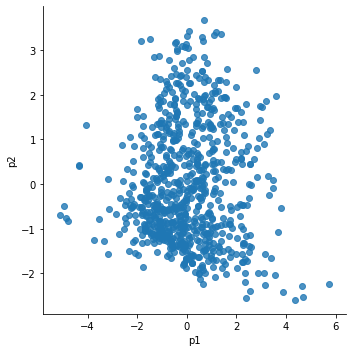

In [23]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [24]:
from sklearn.cluster import KMeans

In [26]:
l = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    l.append(cl.inertia_)

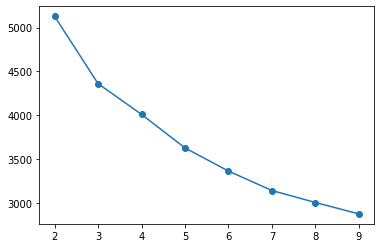

In [27]:
plt.plot(range(2,10),l,marker='o')

In [28]:
cl = KMeans(n_clusters=6)

In [29]:
cl.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
X['cl'] = Xs['cl'] = Xp['cl'] = cl.predict(Xs)

In [32]:
X['cl'].value_counts()

1    222
3    193
0    138
5    122
2     57
4     36
Name: cl, dtype: int64

In [31]:
X.groupby('cl').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
cl,,,,,,,,
0,5.934783,132.442029,77.971014,0.855072,0.942029,31.944928,0.402217,44.652174
1,2.108108,101.950450,66.630631,14.815315,41.860360,26.695045,0.390658,25.306306
2,3.105263,162.543860,71.368421,31.701754,370.438596,35.740351,0.586368,32.000000
3,1.901554,116.300518,72.134715,33.974093,97.580311,37.203109,0.549383,27.341969
4,3.555556,117.000000,0.666667,2.000000,0.694444,25.763889,0.393167,30.444444
5,8.147541,131.262295,77.926230,32.204918,97.459016,33.530328,0.545582,45.508197


In [54]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [98]:
Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7)

In [100]:
modelo = BernoulliNB()
modelo.fit(Xt,yt)
print(accuracy_score(y_pred=modelo.predict(Xt),y_true=yt))
print(accuracy_score(y_pred=modelo.predict(Xv),y_true=yv))

0.6586826347305389
0.641860465116279


In [101]:
modelo = MultinomialNB()
modelo.fit(Xt,yt)
print(accuracy_score(y_pred=modelo.predict(Xt),y_true=yt))
print(accuracy_score(y_pred=modelo.predict(Xv),y_true=yv))

0.6846307385229541
0.7441860465116279


In [77]:
modelo = GaussianNB()
modelo.fit(Xt[['BMI','BloodPressure','Glucose']],yt)
print(accuracy_score(y_pred=modelo.predict(Xt[['BMI','BloodPressure','Glucose']]),y_true=yt))
print(accuracy_score(y_pred=modelo.predict(Xv[['BMI','BloodPressure','Glucose']]),y_true=yv))

ValueError: could not convert string to float: '(28.7, 38.3]'

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y_pred=modelo.predict(Xt[['BMI','BloodPressure','Glucose']]),y_true=yt))
print(confusion_matrix(y_pred=modelo.predict(Xv[['BMI','BloodPressure','Glucose']]),y_true=yv))

[[301  42]
 [ 81 113]]
[[137  20]
 [ 31  43]]


In [69]:
(137+43)/(137+43+20+31)

0.7792207792207793

In [70]:
df['Outcome'].value_counts(normalize=True)

0    0.653631
1    0.346369
Name: Outcome, dtype: float64

In [95]:
for v in var:
    df[v]  = pd.cut(df[v],bins=5,include_lowest=True,labels=range(5))

In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,3,2,35,0,1,1,2,1
1,0,1,1,29,0,0,0,0,0
2,2,4,1,0,0,0,1,0,1
3,0,1,1,23,94,0,0,0,0
4,0,2,0,35,168,2,4,0,1
